In [2]:
%%file eggnog_utils.py
from io import StringIO

import pandas as pd


s = '''A	RNA processing and modification
B	Chromatin Structure and dynamics
C	Energy production and conversion
D	Cell cycle control and mitosis
E	Amino Acid metabolism and transport
F	Nucleotide metabolism and transport
G	Carbohydrate metabolism and transport
H	Coenzyme metabolism
I	Lipid metabolism
J	Translation
K	Transcription
L	Replication and repair
M	Cell wall/membrane/envelope biogenesis
N	Cell motility
O	Post-translational modification, protein turnover, chaperone functions
P	Inorganic ion transport and metabolism
Q	Secondary Structure
T	Signal Transduction
U	Intracellular trafficking and secretion
V	Defense mechanisms
Y	Nuclear structure
W	Extracellular structures
Z	Cytoskeleton
R	General Functional Prediction only
S	Function Unknown'''

cog_categories = pd.read_table(StringIO(s), names=['letter', 'function'], index_col=0, squeeze=True)
cog_categories.head()


COLUMN_NAMES = ['query', 'seed_ortholog', 'evalue', 'score', 'predicted_name', 'go_terms', 
                'kegg_ko', 'bigg_reactions',
           'tax_scope', 'eggnog_ogs', 'best_og', 'cog_cat', 'eggnog_hmmm_desc']


def read_eggnog(filename):
    eggnog = pd.read_table(filename, header=None, names=COLUMN_NAMES)
    eggnog['cog_category_full'] = eggnog.cog_cat.map(
        lambda x: '; '.join([cog_categories[i] for i in x.split(', ')]) if pd.notnull(x) else x)
    return eggnog

Overwriting eggnog_utils.py


In [3]:
pwd

'/Users/olgabot/code/tick-genome/notebooks'

In [4]:
! ls ../data/00_original/

tick0.fake_ref_transcriptome.fasta.emapper.annotations.tsv
tick1.fake_ref_transcriptome.fasta.emapper.annotations.tsv
tick2.fake_ref_transcriptome.fasta.emapper.annotations.tsv
tick4.fake_ref_transcriptome.fasta.emapper.annotations.tsv


In [5]:
import glob
import os

import pandas as pd

import eggnog_utils

dfs = []

for filename in glob.glob('../data/00_original/tick*.fake_ref_transcriptome.fasta.emapper.annotations.tsv'):
    
    new_filename = filename.replace('00_original', '012_read_eggnog_output')
    ! mkdir $(dirname $new_filename)
    df = eggnog_utils.read_eggnog(filename)
    df.to_csv(new_filename, sep='\t')
    print('writing ...', new_filename)
    df['tick_id'] = os.path.basename(filename).split('.')[0]
    dfs.append(df)
annotations = pd.concat(dfs, ignore_index=True)
print(annotations.shape)
annotations.head()

mkdir: ../data/012_read_eggnog_output: File exists
writing ... ../data/012_read_eggnog_output/tick0.fake_ref_transcriptome.fasta.emapper.annotations.tsv
mkdir: ../data/012_read_eggnog_output: File exists
writing ... ../data/012_read_eggnog_output/tick1.fake_ref_transcriptome.fasta.emapper.annotations.tsv
mkdir: ../data/012_read_eggnog_output: File exists
writing ... ../data/012_read_eggnog_output/tick2.fake_ref_transcriptome.fasta.emapper.annotations.tsv
mkdir: ../data/012_read_eggnog_output: File exists
writing ... ../data/012_read_eggnog_output/tick4.fake_ref_transcriptome.fasta.emapper.annotations.tsv
(15067, 15)


,query,seed_ortholog,evalue,score,predicted_name,go_terms,kegg_ko,bigg_reactions,tax_scope,eggnog_ogs,best_og,cog_cat,eggnog_hmmm_desc,cog_category_full,tick_id
0,PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Q...,6945.ISCW018217-PA,1.400000e-66,260.8,SDC,"GO:0000902,GO:0000904,GO:0001667,GO:0003008,GO...",K16336,NaN,artNOG[6],"0386E@artNOG,0A1US@biNOG,0IW5I@euNOG,0VCQE@meN...",NA|NA|NA,T,Cell surface proteoglycan (By similarity),Signal Transduction,tick0
1,PB.8.1|1008_0|path3:1-3937(+)|HQ_sampleytBMi1Q...,6945.ISCW018083-PA,3.500000e-149,535.0,NaN,NaN,NaN,NaN,artNOG[6],"033W7@artNOG,09WWC@biNOG,0V7UI@meNOG,0XQ0P@NOG...",NA|NA|NA,U,TRIC channel,Intracellular trafficking and secretion,tick0
2,PB.9.1|1008_0|path4:1-3923(+)|HQ_sampleytBMi1Q...,6945.ISCW018083-PA,5.900000e-149,534.3,NaN,NaN,NaN,NaN,artNOG[6],"033W7@artNOG,09WWC@biNOG,0V7UI@meNOG,0XQ0P@NOG...",NA|NA|NA,U,TRIC channel,Intracellular trafficking and secretion,tick0
3,PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Q...,6945.ISCW018610-PA,3.300000e-38,165.2,NOLC1,"GO:0000278,GO:0000280,GO:0001071,GO:0002119,GO...",K11294,NaN,meNOG[21],"0A3DQ@biNOG,0VF6Y@meNOG,11U5P@NOG,13M9C@opiNOG...",NA|NA|NA,Y,nucleolar and coiled-body phosphoprotein 1,Nuclear structure,tick0
4,PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBM...,7227.FBpp0100183,3.100000e-56,224.9,NaN,"GO:0003674,GO:0003824,GO:0003954,GO:0005575,GO...",K03881,NaN,artNOG[6],"03GA4@artNOG,0AYRX@biNOG,0H2PW@dipNOG,0KFRK@eu...",NA|NA|NA,C,"NADH-Ubiquinone/plastoquinone (complex I), var...",Energy production and conversion,tick0


In [59]:
%time annotations.to_csv('../data/012_read_eggnog_output/all_tick_annotations.csv')

CPU times: user 373 ms, sys: 64.1 ms, total: 437 ms
Wall time: 445 ms


In [60]:
%time annotations.to_parquet('../data/012_read_eggnog_output/all_tick_annotations.parquet')

CPU times: user 419 ms, sys: 227 ms, total: 646 ms
Wall time: 841 ms


In [62]:
ls -lha ../data/012_read_eggnog_output/

total 56864
drwxr-xr-x  10 olgabot  staff   340B Oct 10 13:23 ./
drwxr-xr-x   5 olgabot  staff   170B Oct 10 12:50 ../
-rw-r--r--   1 olgabot  staff    12M Oct 10 13:22 all_tick_annotations.csv
-rw-r--r--   1 olgabot  staff   3.2M Oct 10 13:22 all_tick_annotations.parquet
-rw-r--r--   1 olgabot  staff   208K Oct 10 13:20 go_terms_per_tick.csv
-rw-r--r--   1 olgabot  staff   208K Oct 10 13:21 go_terms_per_tick_scaled.csv
-rw-r--r--   1 olgabot  staff   3.2M Oct 10 13:05 tick0.fake_ref_transcriptome.fasta.emapper.annotations.tsv
-rw-r--r--   1 olgabot  staff   4.1M Oct 10 13:05 tick1.fake_ref_transcriptome.fasta.emapper.annotations.tsv
-rw-r--r--   1 olgabot  staff   2.5M Oct 10 13:05 tick2.fake_ref_transcriptome.fasta.emapper.annotations.tsv
-rw-r--r--   1 olgabot  staff   2.3M Oct 10 13:05 tick4.fake_ref_transcriptome.fasta.emapper.annotations.tsv


In [7]:
annotations['cog_category_full'].nunique()

96

In [8]:
annotations['eggnog_hmmm_desc'].nunique()

4694

In [9]:
annotations['query'].is_unique

True

In [10]:
data = annotations['go_terms'].map(
    lambda x: dict.fromkeys(x.split(','), 1) if isinstance(x, str) else dict()).values
go_matrix = pd.DataFrame.from_records(data)
go_matrix.index = annotations['query']
go_matrix = go_matrix.fillna(0)
print(go_matrix.shape)
go_matrix.head()

(15067, 10718)


,GO:0000001,GO:0000002,GO:0000003,GO:0000009,GO:0000010,GO:0000014,GO:0000018,GO:0000022,GO:0000023,GO:0000026,...,GO:2001257,GO:2001258,GO:2001259,GO:2001260,GO:2001261,GO:2001270,GO:2001271,GO:2001272,GO:2001273,GO:2001275
query,,,,,,,,,,,,,,,,,,,,,
PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Qu|cb553_c1/f4p5/4244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.8.1|1008_0|path3:1-3937(+)|HQ_sampleytBMi1Qu|cb10120_c15/f2p3/3984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.9.1|1008_0|path4:1-3923(+)|HQ_sampleytBMi1Qu|cb10120_c8/f3p1/3971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Qu|cb16611_c40331/f3p7/1772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBMi1Qu|cb16611_c205636/f9p10/1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
go_sums = go_matrix.sum()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


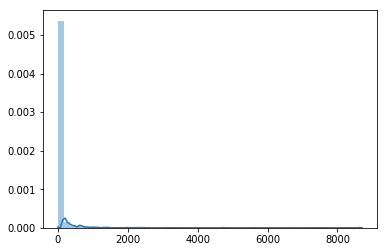

In [12]:
import seaborn as sns

%matplotlib inline
sns.distplot(go_sums)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


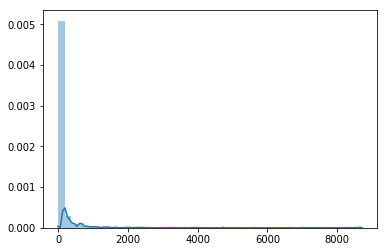

In [13]:
sns.distplot(go_sums[go_sums >= 5])

In [14]:
(go_sums > 5).sum()

5526

In [15]:
go_matrix_bool = go_matrix.astype(bool)

In [16]:
go_sums.head()

GO:0000001       4.0
GO:0000002      16.0
GO:0000003    1660.0
GO:0000009       1.0
GO:0000010       5.0
dtype: float64

In [17]:
# annotations.loc[go_matrix['GO:0000003']]

In [19]:
    # go_sums.groupby(annotations['tick_id']).apply(lambda x:)

## find shared vs unshared GO terms

In [23]:
annotations.tick_id.value_counts()

tick1    5063
tick0    3861
tick2    3443
tick4    2700
Name: tick_id, dtype: int64

In [26]:
import collections

go_terms_per_tick = go_matrix_bool.groupby(level=0, axis=1).apply(
    lambda x: collections.Counter(annotations.loc[x.iloc[:,0].values, 'tick_id']))
go_terms_per_tick

GO:0000001                 {'tick1': 1, 'tick2': 2, 'tick4': 1}
GO:0000002     {'tick0': 3, 'tick1': 7, 'tick2': 5, 'tick4': 1}
GO:0000003    {'tick0': 416, 'tick1': 595, 'tick2': 334, 'ti...
GO:0000009                                         {'tick4': 1}
GO:0000010                 {'tick1': 2, 'tick2': 1, 'tick4': 2}
GO:0000014                 {'tick1': 3, 'tick2': 2, 'tick4': 1}
GO:0000018     {'tick0': 2, 'tick1': 4, 'tick2': 1, 'tick4': 1}
GO:0000022    {'tick0': 124, 'tick1': 58, 'tick2': 33, 'tick...
GO:0000023                             {'tick1': 1, 'tick2': 1}
GO:0000026                 {'tick0': 1, 'tick1': 1, 'tick2': 1}
GO:0000027                             {'tick1': 1, 'tick4': 2}
GO:0000028                 {'tick0': 2, 'tick2': 2, 'tick4': 2}
GO:0000030     {'tick0': 4, 'tick1': 6, 'tick2': 3, 'tick4': 1}
GO:0000036                 {'tick0': 1, 'tick1': 1, 'tick4': 1}
GO:0000038    {'tick0': 6, 'tick1': 7, 'tick2': 17, 'tick4': 4}
GO:0000041    {'tick0': 10, 'tick1': 16,

In [35]:
go_terms_per_tick_df = pd.DataFrame.from_records(go_terms_per_tick.to_dict()).T
go_terms_per_tick_df = go_terms_per_tick_df.fillna(0)
go_terms_per_tick_df = go_terms_per_tick_df.astype(int)
print(go_terms_per_tick_df.shape)
go_terms_per_tick_df.head()

(10718, 4)


,tick0,tick1,tick2,tick4
GO:0000001,0,1,2,1
GO:0000002,3,7,5,1
GO:0000003,416,595,334,315
GO:0000009,0,0,0,1
GO:0000010,0,2,1,2


In [71]:
absent_go_terms = (go_terms_per_tick_df == 0).sum(axis=1)
go_terms_per_tick_df.loc[absent_go_terms > 2]

,tick0,tick1,tick2,tick4
GO:0000009,0,0,0,1
GO:0000052,1,0,0,0
GO:0000087,0,2,0,0
GO:0000089,0,1,0,0
GO:0000091,0,1,0,0
GO:0000103,1,0,0,0
GO:0000110,0,2,0,0
GO:0000114,0,2,0,0
GO:0000126,0,0,1,0
GO:0000133,0,0,1,0


In [56]:
data_folder = '../data/012_read_eggnog_output'

In [57]:
go_terms_per_tick_df.to_csv(f'{data_folder}/go_terms_per_tick.csv')

In [65]:
go_terms_per_tick_df_scaled = go_terms_per_tick_df.divide(annotations.tick_id.value_counts())
go_terms_per_tick_df_scaled = go_terms_per_tick_df_scaled*1000
go_terms_per_tick_df_scaled.head(10)

,tick0,tick1,tick2,tick4
GO:0000001,0.000000,0.197511,0.580889,0.370370
GO:0000002,0.777001,1.382579,1.452222,0.370370
GO:0000003,107.744108,117.519257,97.008423,116.666667
GO:0000009,0.000000,0.000000,0.000000,0.370370
GO:0000010,0.000000,0.395023,0.290444,0.740741
GO:0000014,0.000000,0.592534,0.580889,0.370370
GO:0000018,0.518001,0.790045,0.290444,0.370370
GO:0000022,32.116032,11.455659,9.584665,16.666667
GO:0000023,0.000000,0.197511,0.290444,0.000000
GO:0000026,0.259000,0.197511,0.290444,0.000000


In [58]:
go_terms_per_tick_df.to_csv(f'{data_folder}/go_terms_per_tick_scaled.csv')

In [46]:
import numpy as np

In [47]:
np.diff(go_terms_per_tick_df_scaled.iloc[7, :].nlargest(2))

array([-15.44936545])

In [53]:
diffs = go_terms_per_tick_df_scaled.apply(lambda x: np.diff(x.nlargest(2))[0], axis=1)
diffs.head()

GO:0000001   -0.210518
GO:0000002   -0.069642
GO:0000003   -0.852591
GO:0000009   -0.370370
GO:0000010   -0.345718
dtype: float64

In [54]:
go_terms_per_tick_df_scaled.loc[diffs < -10, :]

,tick0,tick1,tick2,tick4
GO:0000022,32.116032,11.455659,9.584665,16.666667
GO:0000226,62.160062,42.267430,26.430439,49.629630
GO:0000278,63.455063,45.230101,30.206216,50.000000
GO:0002165,42.217042,61.623543,35.434214,51.481481
GO:0003008,50.764051,48.390282,41.823991,63.703704
GO:0003735,48.951049,16.195931,18.878885,22.592593
GO:0005198,65.009065,25.676476,27.301772,39.629630
GO:0005488,220.409220,237.408651,174.557072,255.555556
GO:0005575,529.137529,488.840608,448.736567,509.629630
GO:0005622,484.330484,435.512542,392.971246,462.222222


In [25]:
%debug

> /anaconda3/lib/python3.6/site-packages/pandas/core/generic.py(387)_get_axis_name()
    385                 pass
    386         raise ValueError('No axis named {0} for object type {1}'
--> 387                          .format(axis, type(self)))
    388 
    389     def _get_axis(self, axis):

ipdb> dir()
['axis', 'self']
ipdb> a
self = tick2    2
tick4    1
tick1    1
Name: tick_id, dtype: int64
axis = 1
ipdb> q


In [ ]:
go_matrix = go_matrix.astype(int)

In [63]:
go_matrix.to_csv('s3://tick-genome/rna/pacbio-isoseq/2018-06-07/fake_genome_and_transcriptome/go_matrix.csv')

FileNotFoundError: [Errno 2] No such file or directory: 's3://tick-genome/rna/pacbio-isoseq/2018-06-07/fake_genome_and_transcriptome/go_matrix.csv'

In [ ]:
ls -lha ../data/012_read_eggnog_output/

In [78]:
def get_go_categories_in_more_than_one_tick(col):
    return annotations.loc[col.iloc[:,0].values, 'tick_id'].nunique() > 1

min_transcipts = 5

# At least 5 transcripts per go term
go_matrix_filtered = go_matrix.loc[:, go_sums >= min_transcipts]

min_go_terms = 3
# At least 3 Go terms per transcript
go_matrix_filtered = go_matrix_filtered.loc[go_matrix_filtered.sum(axis=1) >= min_go_terms, :]
print(go_matrix_filtered.shape)
go_matrix_filtered.head()

(9415, 6005)


,GO:0000002,GO:0000003,GO:0000010,GO:0000014,GO:0000018,GO:0000022,GO:0000028,GO:0000030,GO:0000038,GO:0000041,...,GO:2001028,GO:2001056,GO:2001135,GO:2001141,GO:2001233,GO:2001251,GO:2001252,GO:2001257,GO:2001258,GO:2001259
query,,,,,,,,,,,,,,,,,,,,,
PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Qu|cb553_c1/f4p5/4244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Qu|cb16611_c40331/f3p7/1772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBMi1Qu|cb16611_c205636/f9p10/1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.14.2|1011_0|path0:324-1775(-)|HQ_sampleytBMi1Qu|cb16611_c12246/f2p10/1445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.16.2|1011_0|path1:609-1172(-)|HQ_sampleytBMi1Qu|cb14387_c286/f2p1/566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
go_matrix_filtered.iloc[:100, :100]

,GO:0000002,GO:0000003,GO:0000010,GO:0000014,GO:0000018,GO:0000022,GO:0000028,GO:0000030,GO:0000038,GO:0000041,...,GO:0000338,GO:0000339,GO:0000340,GO:0000346,GO:0000347,GO:0000375,GO:0000377,GO:0000380,GO:0000381,GO:0000387
query,,,,,,,,,,,,,,,,,,,,,
PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Qu|cb553_c1/f4p5/4244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Qu|cb16611_c40331/f3p7/1772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBMi1Qu|cb16611_c205636/f9p10/1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.14.2|1011_0|path0:324-1775(-)|HQ_sampleytBMi1Qu|cb16611_c12246/f2p10/1445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.16.2|1011_0|path1:609-1172(-)|HQ_sampleytBMi1Qu|cb14387_c286/f2p1/566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.21.3|1011_1|path0:438-1389(+)|HQ_sampleytBMi1Qu|cb14387_c185/f2p1/939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.21.4|1011_1|path0:438-733(+)|HQ_sampleytBMi1Qu|cb14387_c188/f2p1/292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.21.5|1011_1|path0:709-1146(+)|HQ_sampleytBMi1Qu|cb14387_c602/f3p0/437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.26.1|1011_5|path3:105-1807(-)|HQ_sampleytBMi1Qu|cb16611_c274597/f110p29/1704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
go_matrix_filtered.isnull().sum().sum()

0

In [81]:
from matplotlib.colors import rgb2hex

palette = [rgb2hex(x) for x in sns.color_palette('Set2', n_colors=annotations['tick_id'].nunique())]
palette

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

In [82]:
tick_ids = annotations['tick_id'].unique()
tick_ids

array(['tick0', 'tick1', 'tick2', 'tick4'], dtype=object)

In [83]:
tick_to_color = dict(zip(tick_ids, palette))
tick_to_color

{'tick0': '#66c2a5',
 'tick1': '#fc8d62',
 'tick2': '#8da0cb',
 'tick4': '#e78ac3'}

In [84]:
tick_colors = pd.Series([tick_to_color[x] for x in annotations['tick_id']], 
                        index=go_matrix.index)
tick_colors[:10]

query
PB.3.1|1001_0|path0:1-4172(+)|HQ_sampleytBMi1Qu|cb553_c1/f4p5/4244               #66c2a5
PB.8.1|1008_0|path3:1-3937(+)|HQ_sampleytBMi1Qu|cb10120_c15/f2p3/3984            #66c2a5
PB.9.1|1008_0|path4:1-3923(+)|HQ_sampleytBMi1Qu|cb10120_c8/f3p1/3971             #66c2a5
PB.11.2|101_0|path4:1-2908(+)|HQ_sampleytBMi1Qu|cb16611_c40331/f3p7/1772         #66c2a5
PB.14.1|1011_0|path0:183-1775(-)|HQ_sampleytBMi1Qu|cb16611_c205636/f9p10/1592    #66c2a5
PB.14.2|1011_0|path0:324-1775(-)|HQ_sampleytBMi1Qu|cb16611_c12246/f2p10/1445     #66c2a5
PB.16.2|1011_0|path1:609-1172(-)|HQ_sampleytBMi1Qu|cb14387_c286/f2p1/566         #66c2a5
PB.21.3|1011_1|path0:438-1389(+)|HQ_sampleytBMi1Qu|cb14387_c185/f2p1/939         #66c2a5
PB.21.4|1011_1|path0:438-733(+)|HQ_sampleytBMi1Qu|cb14387_c188/f2p1/292          #66c2a5
PB.21.5|1011_1|path0:709-1146(+)|HQ_sampleytBMi1Qu|cb14387_c602/f3p0/437         #66c2a5
dtype: object

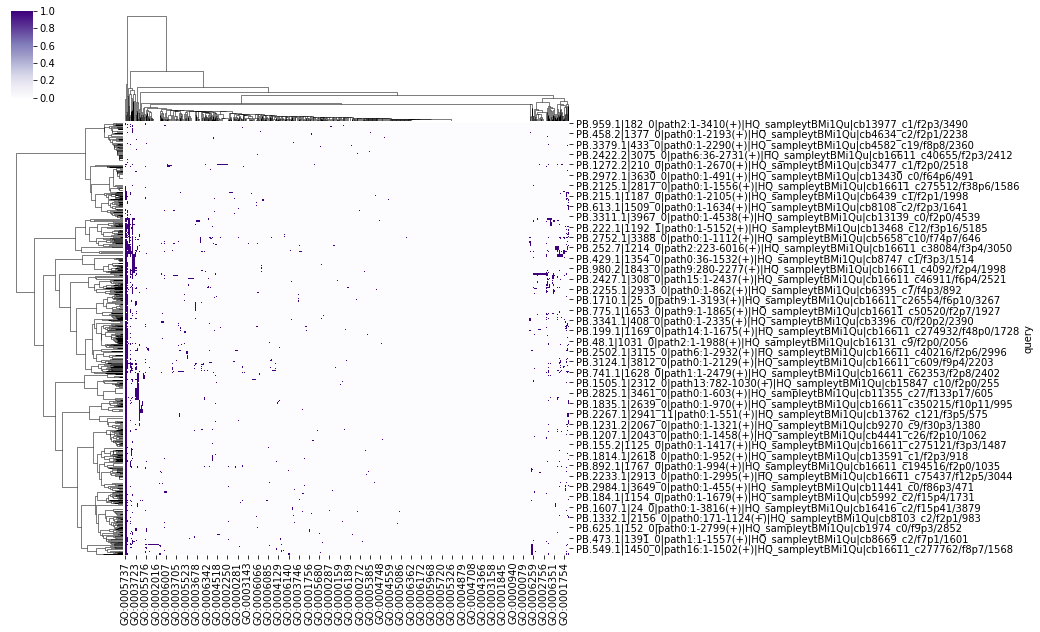

In [85]:
# import seaborn as sns
# sns.clustermap(go_matrix_filtered.iloc[:1000, :1000], 
#                method='ward', cmap='Purples')

In [ ]:
# import seaborn as sns
# sns.clustermap(go_matrix_filtered, row_colors=tick_colors, 
#                metric='cosine', cmap='Purples')

In [1]:
# import seaborn as sns

# sns.clustermap(go_matrix_filtered, 
#                row_colors=tick_colors,
#                method='ward', cmap='Purples')